<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.740733,93.049514,0.119007,164.909255,164.751396,0.157858
1,0.0,1.0,54.857900,30.617895,0.140187,95.615982,95.523450,0.092532
2,0.0,2.0,47.217492,22.003818,0.036710,79.258020,79.284080,-0.026060
3,0.0,3.0,23.151206,55.666751,0.192945,89.010902,88.847279,0.163623
4,0.0,4.0,28.613679,31.649130,0.160236,70.423046,70.321558,0.101488
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.349005,97.909890,-0.280074,134.978821,135.356775,-0.377955
119996,999.0,116.0,52.169945,55.557280,-0.336086,117.391140,117.732303,-0.341163
119997,999.0,117.0,72.065951,36.780123,-0.261843,118.584232,118.801138,-0.216906
119998,999.0,118.0,21.581528,48.805398,-0.051903,80.335022,80.411667,-0.076644


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.740733  93.049514  0.119007  164.909255  164.751396  0.157858
      1.0    54.857900  30.617895  0.140187   95.615982   95.523450  0.092532
      2.0    47.217492  22.003818  0.036710   79.258020   79.284080 -0.026060
      3.0    23.151206  55.666751  0.192945   89.010902   88.847279  0.163623
      4.0    28.613679  31.649130  0.160236   70.423046   70.321558  0.101488
...                ...        ...       ...         ...         ...       ...
999.0 115.0  27.349005  97.909890 -0.280074  134.978821  135.356775 -0.377955
      116.0  52.169945  55.557280 -0.336086  117.391140  117.732303 -0.341163
      117.0  72.065951  36.780123 -0.261843  118.584232  118.801138 -0.216906
      118.0  21.581528  48.805398 -0.051903   80.335022   80.411667 -0.076644
      119.0  51.738796  47.837171 -0.017290  109.558677  109.569071 -0.010394

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.740733  93.049514  0.119007  164.909255  164.751396  0.157858
      1.0    54.857900  30.617895  0.140187   95.615982   95.523450  0.092532
      2.0    47.217492  22.003818  0.036710   79.258020   79.284080 -0.026060
      3.0    23.151206  55.666751  0.192945   89.010902   88.847279  0.163623
      4.0    28.613679  31.649130  0.160236   70.423046   70.321558  0.101488
...                ...        ...       ...         ...         ...       ...
999.0 115.0  27.349005  97.909890 -0.280074  134.978821  135.356775 -0.377955
      116.0  52.169945  55.557280 -0.336086  117.391140  117.732303 -0.341163
      117.0  72.065951  36.780123 -0.261843  118.584232  118.801138 -0.216906
      118.0  21.581528  48.805398 -0.051903   80.335022   80.411667 -0.076644
      119.0  51.738796  47.837171 -0.017290  109.558677  109.569071 -0.010394

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.740733,93.049514,0.119007,164.909255,164.751396,0.157858
1,0.0,1.0,54.857900,30.617895,0.140187,95.615982,95.523450,0.092532
2,0.0,2.0,47.217492,22.003818,0.036710,79.258020,79.284080,-0.026060
3,0.0,3.0,23.151206,55.666751,0.192945,89.010902,88.847279,0.163623
4,0.0,4.0,28.613679,31.649130,0.160236,70.423046,70.321558,0.101488
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.349005,97.909890,-0.280074,134.978821,135.356775,-0.377955
119996,999.0,116.0,52.169945,55.557280,-0.336086,117.391140,117.732303,-0.341163
119997,999.0,117.0,72.065951,36.780123,-0.261843,118.584232,118.801138,-0.216906
119998,999.0,118.0,21.581528,48.805398,-0.051903,80.335022,80.411667,-0.076644


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    61.740733  93.049514  0.119007  164.909255  164.751396  0.157858
      1.0    54.857900  30.617895  0.140187   95.615982   95.523450  0.092532
      2.0    47.217492  22.003818  0.036710   79.258020   79.284080 -0.026060
      3.0    23.151206  55.666751  0.192945   89.010902   88.847279  0.163623
      4.0    28.613679  31.649130  0.160236   70.423046   70.321558  0.101488
...                ...        ...       ...         ...         ...       ...
999.0 115.0  27.349005  97.909890 -0.280074  134.978821  135.356775 -0.377955
      116.0  52.169945  55.557280 -0.336086  117.391140  117.732303 -0.341163
      117.0  72.065951  36.780123 -0.261843  118.584232  118.801138 -0.216906
      118.0  21.581528  48.805398 -0.051903   80.335022   80.411667 -0.076644
      119.0  51.738796  47.837171 -0.017290  109.558677  109.569071 -0.010394

[120000 rows x 6 columns]

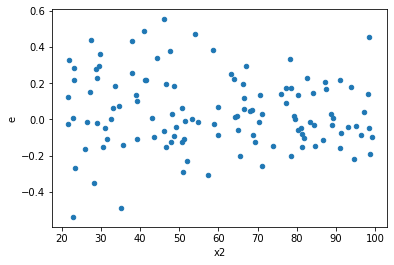

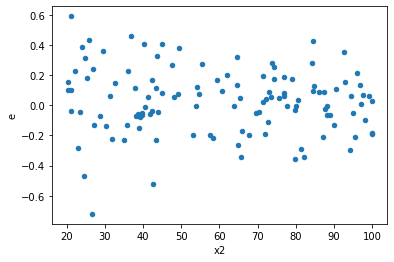

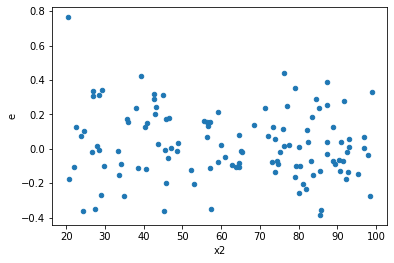

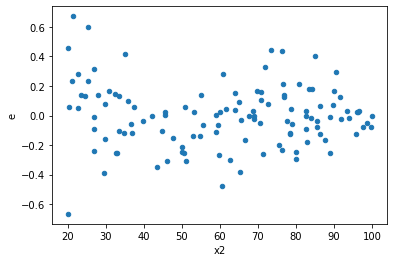

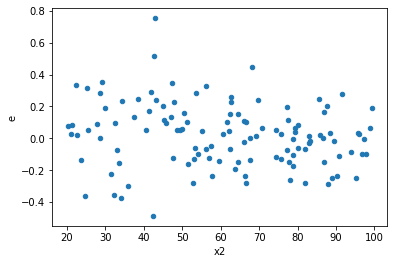

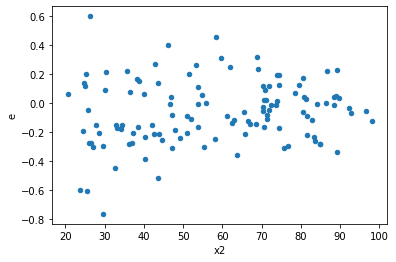

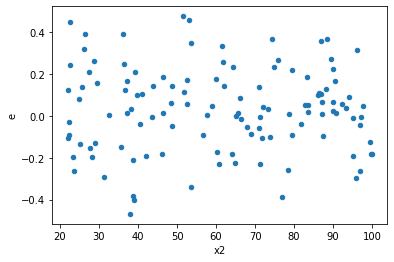

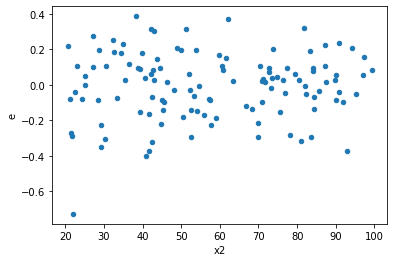

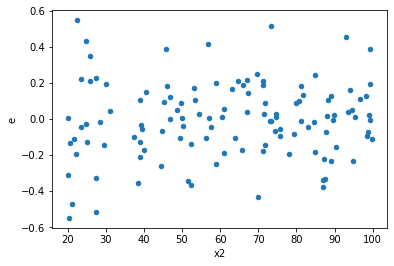

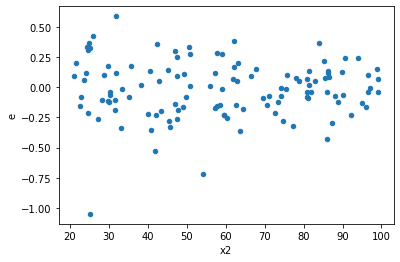

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,62.0,54.0,1.8050875673527855,3.4583527052025156,0.02911431560246428,0.0640435686148614,2.1997277727332407,0.003576534717796509,0.9982117326411017,0.0017882673588982545,Reject005=0 : Heteroscedasticity
5.0,59.0,57.0,1.8937798074118881,2.426645861996608,0.03209796283748963,0.04257273442099312,1.3263375821243466,0.2861948226342379,0.856902588682881,0.14309741131711895,Reject005=1 : Homoscedasticity
7.0,51.0,65.0,1.3231512892540283,4.2621717887357695,0.025944142926549573,0.065571873672858,2.5274249320356597,0.0004586648794344672,0.9997706675602828,0.0002293324397172336,Reject005=0 : Heteroscedasticity
13.0,52.0,64.0,1.5472975926112371,3.6002445059605415,0.02975572293483148,0.05625382040563346,1.890521044601602,0.015649141392126253,0.9921754293039369,0.007824570696063127,Reject005=0 : Heteroscedasticity
14.0,46.0,70.0,1.5659055116264908,2.7748720128641486,0.034041424165793276,0.039641028755202125,1.1644938402734526,0.5577907494848506,0.7211046252575747,0.2788953747424253,Reject005=1 : Homoscedasticity
15.0,59.0,57.0,2.14673420845935,3.221360035171266,0.03638532556710763,0.056515088336338004,1.5532384953407619,0.09709871609067688,0.9514506419546616,0.04854935804533844,Reject005=1 : Homoscedasticity
17.0,46.0,70.0,1.1117408397485178,2.975192399809993,0.024168279124967777,0.04250274856871419,1.7586170843585396,0.03235844177619285,0.9838207791119036,0.016179220888096424,Reject005=0 : Heteroscedasticity
18.0,53.0,63.0,1.5205619880736938,3.426070420032143,0.02868984883157913,0.05438207015924037,1.8955160927645467,0.015310729830424474,0.9923446350847878,0.007655364915212237,Reject005=0 : Heteroscedasticity
21.0,51.0,65.0,2.242998234942565,3.311252428126668,0.04398035754789343,0.050942345048102584,1.1582976557802591,0.5719789538800486,0.7140105230599757,0.2859894769400243,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,63.0,53.0,3.991927291513742,1.615918219592232,0.0633639252621229,0.030489023011174187,0.48117320518019796,0.005616499205862081,Reject005=0 : Heteroscedasticity
1.0,62.0,54.0,1.8050875673527855,3.4583527052025156,0.02911431560246428,0.0640435686148614,2.1997277727332407,0.003576534717796509,Reject005=0 : Heteroscedasticity
2.0,58.0,58.0,2.316381557825296,1.8414432020818738,0.03993761306595338,0.03174902072554955,0.7949654044952285,0.38482534137877844,Reject005=1 : Homoscedasticity
3.0,46.0,70.0,2.5066419189665825,2.8799791413288083,0.05449221562970832,0.04114255916184012,0.7550171833976563,0.3114355215441418,Reject005=1 : Homoscedasticity
4.0,62.0,54.0,2.8830645850259753,2.240800560468425,0.04650104169396734,0.0414963066753412,0.8923737009686084,0.6619496754535723,Reject005=1 : Homoscedasticity
5.0,59.0,57.0,1.8937798074118881,2.426645861996608,0.03209796283748963,0.04257273442099312,1.3263375821243466,0.2861948226342379,Reject005=1 : Homoscedasticity
6.0,55.0,61.0,3.0701005528039453,2.669290806630358,0.05582001005098083,0.043758865682464884,0.7839279434471543,0.36062843751501106,Reject005=1 : Homoscedasticity
7.0,51.0,65.0,1.3231512892540283,4.2621717887357695,0.025944142926549573,0.065571873672858,2.5274249320356597,0.0004586648794344672,Reject005=0 : Heteroscedasticity
8.0,60.0,56.0,3.1931172681821423,1.7415779710210664,0.053218621136369035,0.031099606625376187,0.584374528338222,0.042069117120786946,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      629
Reject005=0 : Heteroscedasticity    371
Name: Result_test, dtype: int64